In [94]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [126]:
bank_df = pd.read_csv('bank_marketing_train.csv')

In [127]:
pd.set_option('display.max_columns', 100)

## 前処理

In [128]:
#今回の課題であるターゲット層の特定に必要なさそうな変数を除外
bank_df2 = bank_df.drop(['contact','month','day_of_week','duration','pdays','emp.var.rate',\
                         'cons.price.idx','cons.conf.idx','euribor3m','nr.employed'],axis=1)

In [129]:
#ダミー変数に変換
bank_df2 = pd.get_dummies(bank_df2)

In [131]:
bank_df2.keys()

Index(['age', 'campaign', 'previous', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success', 'y_no',
       'y_yes'],
      dtype='object')

In [132]:
#多重共線性の影響を減少させるためダミー変数の目的項目以外を削除
bank_df2 = bank_df2.drop(['default_no','default_unknown','loan_no','loan_unknown',\
                          'education_unknown','poutcome_success','poutcome_nonexistent',\
                          'poutcome_failure','marital_unknown','housing_no','housing_unknown','y_no'],axis=1)

In [133]:
bank_df2.keys()

Index(['age', 'campaign', 'previous', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default_yes', 'housing_yes', 'loan_yes', 'y_yes'],
      dtype='object')

## trainとtestにデータ分割


In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X = bank_df2.drop('y_yes', axis=1)
y = bank_df2['y_yes']

In [136]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=1234)

## ロジスティック回帰

In [137]:
from sklearn.linear_model import LogisticRegression

In [138]:
#モデルの生成
lr = LogisticRegression() 
#学習
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## モデルの精度評価（クロスバリデーション）

In [139]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(lr,X_test,y_test)
print('Cross-Validation scores: {}'.format(scores))

Cross-Validation scores: [0.92718447 0.92716482 0.927415  ]


In [140]:
print('Average score: {}'.format(np.mean(scores)))

Average score: 0.9272547640083338


## 学習したモデルの係数を表示

In [141]:
#変数名とその係数を格納するデータフレーム
coeff_df = DataFrame([X_train.columns, lr.coef_[0]]).T
#係数を二乗
coeff_df[2] = coeff_df[1]*coeff_df[1]
coeff_df

0           1            2
0                             age -0.00723113  5.22893e-05
1                        campaign  -0.0747016   0.00558034
2                        previous    0.343049     0.117683
3                      job_admin.   -0.224885    0.0505733
4                 job_blue-collar   -0.345144     0.119125
5                job_entrepreneur   -0.293508    0.0861471
6                   job_housemaid   -0.316864     0.100403
7                  job_management   -0.262439    0.0688742
8                     job_retired    0.499165     0.249166
9               job_self-employed  -0.0271486  0.000737046
10                   job_services   -0.339558     0.115299
11                    job_student    0.595175     0.354233
12                 job_technician   -0.253885    0.0644574
13                 job_unemployed   -0.170945    0.0292222
14                    job_unknown   -0.418156     0.174854
15               marital_divorced   -0.427187     0.182488
16                marital_married   -0.378393     0.143181
17                 marital_single   -0.121332    0.0147214
18             education_basic.4y   -0.134987    0.0182214
19             education_basic.6y -0.00973568  9.47835e-05
20             education_basic.9y  -0.0961473   0.00924431
21          education_high.school  -0.0681152   0.00463967
22           education_illiterate   0.0612504   0.00375162
23  education_professional.course  -0.0754419   0.00569148
24    education_university.degree    0.126692     0.016051
25                    default_yes  -0.0923702   0.00853225
26                    housing_yes   0.0252388  0.000636997
27                       loan_yes  -0.0224641  0.000504637

## ペルソナ分析

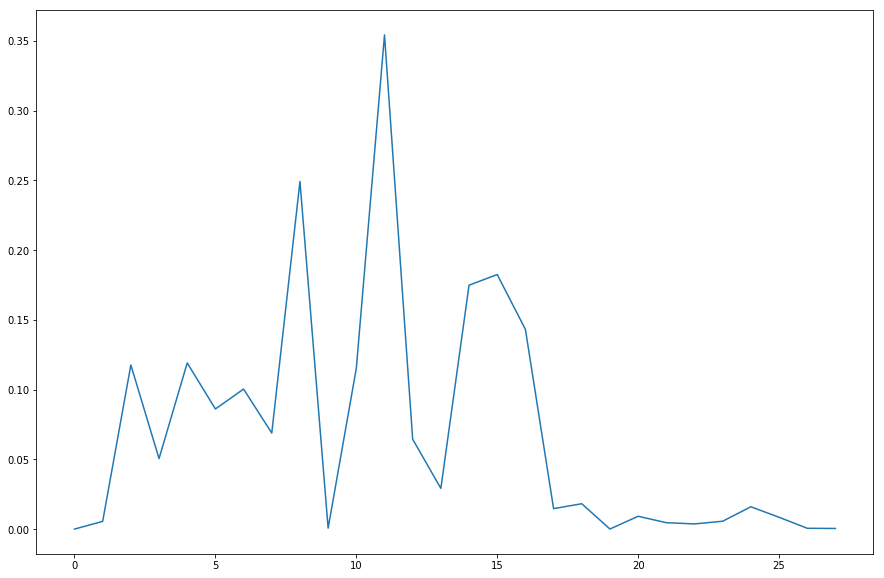

In [142]:
coeff_df[2].plot(figsize=(15, 10))

### marital
### 結婚＞独身

In [143]:
#maritalを抽出し、係数降順でソート
coeff_df.iloc[6:9].sort_index(by=2,ascending = False)

C:\Users\bowwo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


0         1          2
8     job_retired  0.499165   0.249166
6   job_housemaid -0.316864   0.100403
7  job_management -0.262439  0.0688742

### job
### アルバイト、退職老人、肉体労働者

In [144]:
#jobを抽出し、係数降順でソート
coeff_df.iloc[9:20].sort_index(by=2,ascending = False)

C:\Users\bowwo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


0           1            2
11         job_student    0.595175     0.354233
15    marital_divorced   -0.427187     0.182488
14         job_unknown   -0.418156     0.174854
16     marital_married   -0.378393     0.143181
10        job_services   -0.339558     0.115299
12      job_technician   -0.253885    0.0644574
13      job_unemployed   -0.170945    0.0292222
18  education_basic.4y   -0.134987    0.0182214
17      marital_single   -0.121332    0.0147214
9    job_self-employed  -0.0271486  0.000737046
19  education_basic.6y -0.00973568  9.47835e-05

### education
参考）ポルトガル基礎教育課程<br>
第1期：6歳～10歳、第1年生～第4年生<br>
第2期：10歳～12歳　第5年生～第6年生<br>
第3期：12歳～15歳　第7年生～第9年生<br>
中等教育課程　15歳～18歳、第10年生～第12年生

In [145]:
#educationを抽出し、係数降順でソート
coeff_df.iloc[21:28].sort_index(by=2,ascending = False)

C:\Users\bowwo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


0          1            2
24    education_university.degree   0.126692     0.016051
25                    default_yes -0.0923702   0.00853225
23  education_professional.course -0.0754419   0.00569148
21          education_high.school -0.0681152   0.00463967
22           education_illiterate  0.0612504   0.00375162
26                    housing_yes  0.0252388  0.000636997
27                       loan_yes -0.0224641  0.000504637

### age

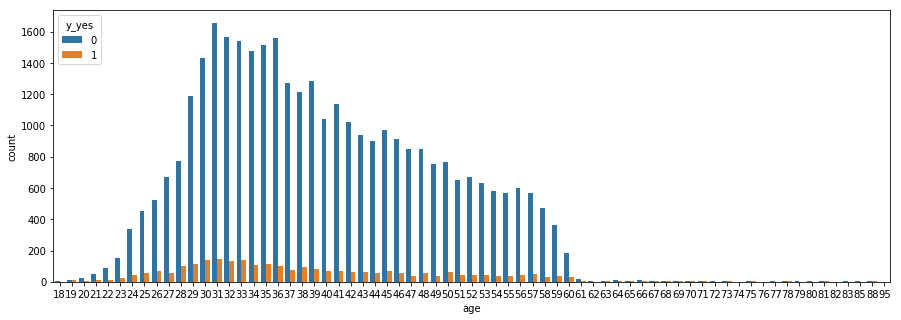

In [146]:
plt.figure(figsize=(15,5))
sns.countplot('age', data=bank_df2, hue='y_yes')

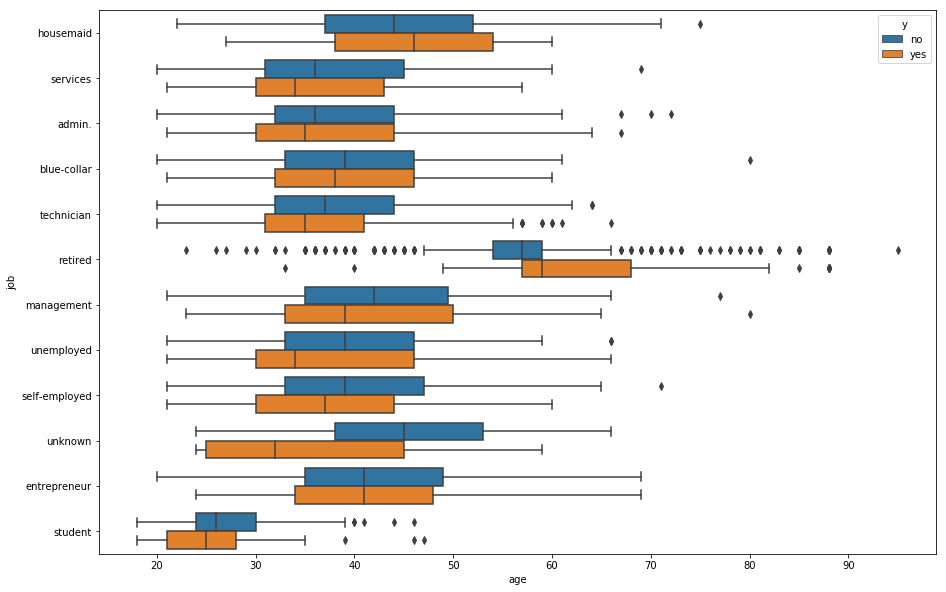

In [147]:
plt.figure(figsize=(15,10))
sns.boxplot(x="age", y="job", data=bank_df, hue='y')